# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
!pip install citipy

from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
api_key= "d66275f1092470d1bd9a78c59d5097a1"

lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = " http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response= requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"] ["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | biltine
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | marquette
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | weno
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | puerto armuelles
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | queenstown
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | hammerfest
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | pangody
Processing Record 18 of Set 1 | pangoa
Processing Record 19 of Set 1 | acarau
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | waitangi
Processing Re

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature

plt. scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color= "blue", linewidths =1)

# Incorporate the other graph properties
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=2, marker="o", color="blue")


# Incorporate the other graph properties
plt.title("Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

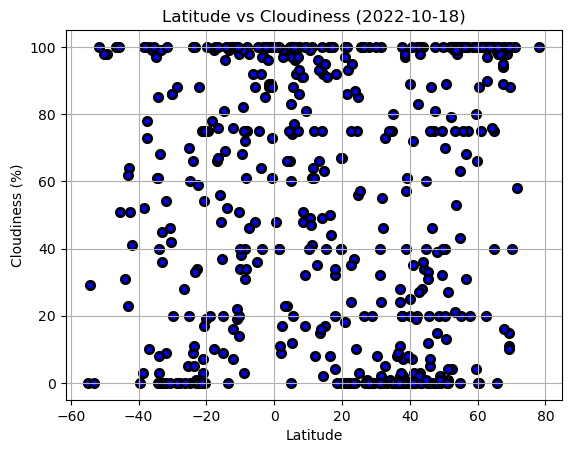

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=2, marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

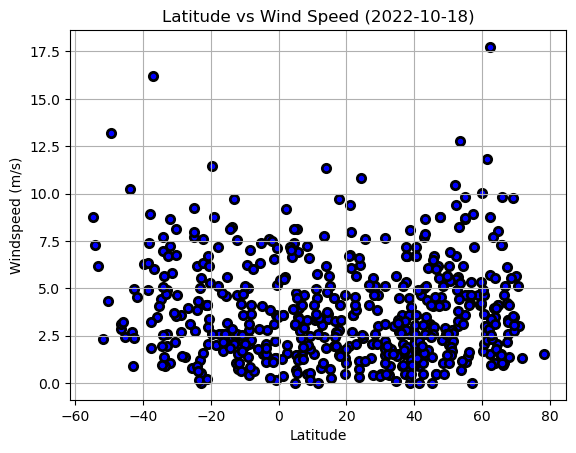

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=2, marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_data, y_data, x_label, y_label, title):
    slope,intercept, r_value, p_value, stderr - stats.linregress(x_data,y_data)
    regression_values= x_data *slope +intercept
    

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,biltine,14.5333,20.9167,27.70,20,92,3.64,TD,1729727536
1,sitka,57.0531,-135.3300,6.94,76,75,0.00,US,1729727538
2,marquette,46.5333,-87.6335,4.09,81,46,0.45,US,1729727539
3,yellowknife,62.4560,-114.3525,1.29,99,20,1.54,CA,1729727540
4,weno,7.4515,151.8468,29.97,84,100,4.63,FM,1729727542


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
7,papatowai,-46.5619,169.4708,14.38,89,100,2.84,NZ,1729727545
8,queenstown,-31.8976,26.8753,11.24,88,9,1.07,ZA,1729727546
9,ushuaia,-54.8000,-68.3000,8.81,61,0,8.75,AR,1729727547
10,edinburgh of the seven seas,-37.0676,-12.3116,14.23,90,100,16.18,SH,1729727548
11,blackmans bay,-43.0167,147.3167,11.96,61,23,0.89,AU,1729727549


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.6926956895042435


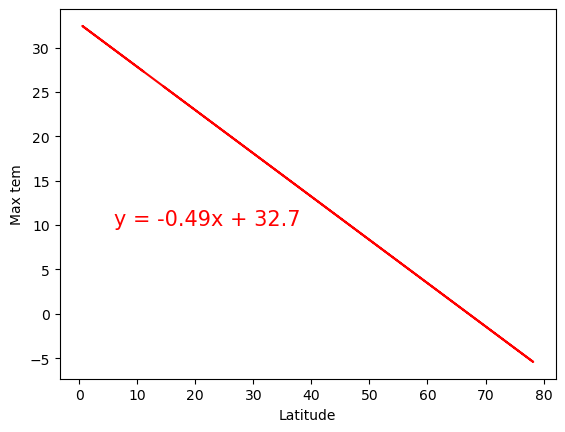

In [80]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"].astype("float")                           
y_values= northern_hemi_df ["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " +str (round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot (x_values, regress_values, "r")
plt.annotate(line_eq,(6,10), fontsize =15, color = "red")
plt.xlabel ('Latitude')
plt.ylabel ('Max tem')
print (f"R squared: {rvalue**2}")
plt.show()

R squared: 0.5304346454526518


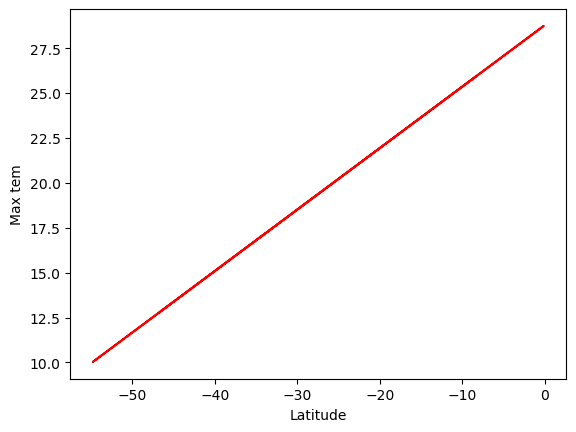

In [84]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"].astype("float")                           
y_values= southern_hemi_df ["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " +str (round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot (x_values, regress_values, "r")
plt.annotate(line_eq,(6,10), fontsize =15, color = "red")
plt.xlabel ('Latitude')
plt.ylabel ('Max tem')
print (f"R squared: {rvalue**2}")
plt.show()

In [ ]:
With the increase in latitude there is an increment in Max temperature in Southern Hemisphere

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.032471692191017434


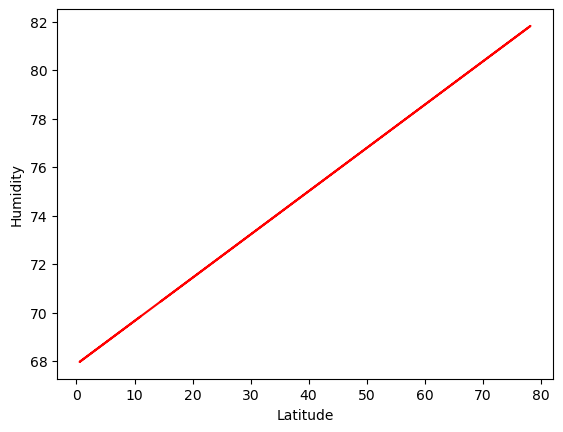

In [90]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"].astype("float")                           
y_values= northern_hemi_df ["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " +str (round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot (x_values, regress_values, "r")
plt.annotate(line_eq,(6,10), fontsize =15, color = "red")
plt.xlabel ('Latitude')
plt.ylabel ('Humidity')
print (f"R squared: {rvalue**2}")
plt.show()

R squared: 0.005317080050220702


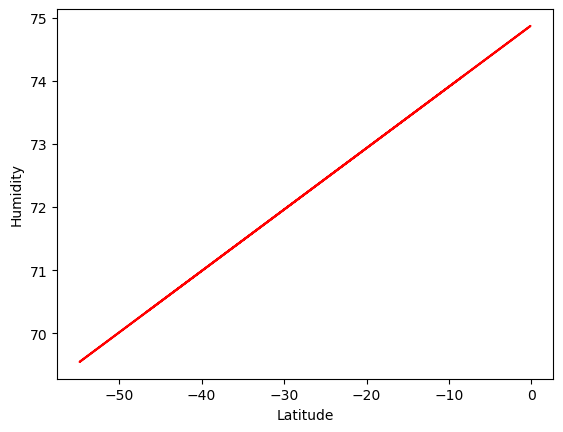

In [74]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"].astype("float")                           
y_values= southern_hemi_df ["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " +str (round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot (x_values, regress_values, "r")
plt.annotate(line_eq,(6,10), fontsize =15, color = "red")
plt.xlabel ('Latitude')
plt.ylabel ('Humidity')
print (f"R squared: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
With an increase in Latitude there is an increment in Humidity in Southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.015168643048641206


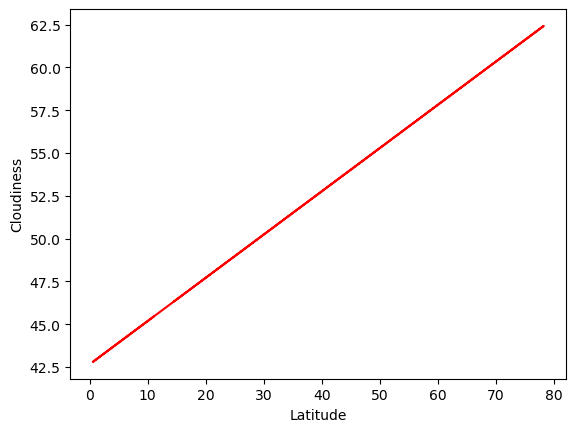

In [72]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"].astype("float")                           
y_values= northern_hemi_df ["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " +str (round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot (x_values, regress_values, "r")
plt.annotate(line_eq,(6,10), fontsize =15, color = "red")
plt.xlabel ('Latitude')
plt.ylabel ('Cloudiness')
print (f"R squared: {rvalue**2}")
plt.show()

R squared: 0.05770211816444996


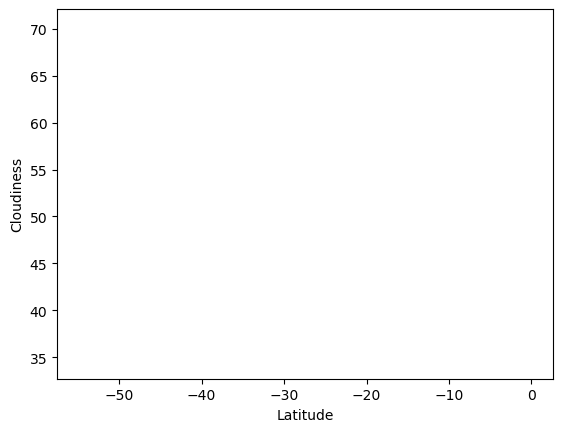

In [92]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"].astype("float")                           
y_values= southern_hemi_df ["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " +str (round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot (x_values, regress_values, "r ")
plt.annotate(line_eq,(6,10), fontsize =15, color = "red")
plt.xlabel ('Latitude')
plt.ylabel ('Cloudiness')
print (f"R squared: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.009509711585695609


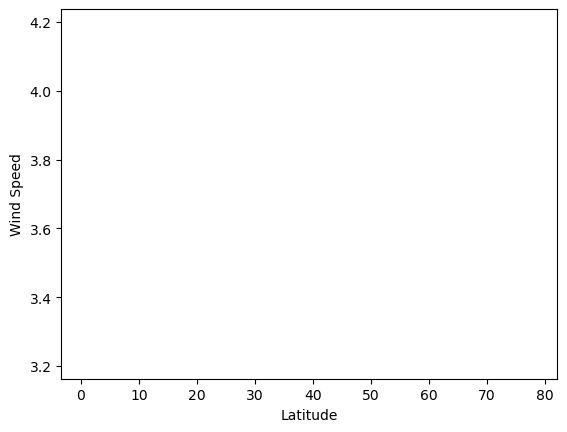

In [102]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"].astype("float")                           
y_values= northern_hemi_df ["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " +str (round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot (x_values, regress_values, "r ")
plt.annotate(line_eq,(6,10), fontsize =15, color = "red")
plt.xlabel ('Latitude')
plt.ylabel ('Wind Speed')
print (f"R squared: {rvalue**2}")
plt.show()

R squared: 0.06165413236589819


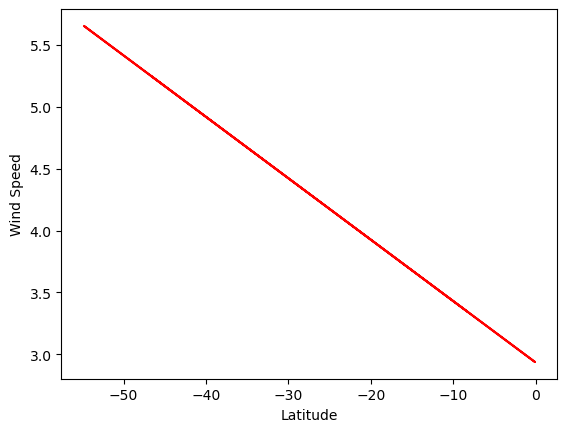

In [100]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"].astype("float")                           
y_values= southern_hemi_df ["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " +str (round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot (x_values, regress_values, "r")
plt.annotate(line_eq,(6,10), fontsize =15, color = "red")
plt.xlabel ('Latitude')
plt.ylabel ('Wind Speed')
print (f"R squared: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
With an increase in Latitude there a decrement in wind speed. There is an inverse relationship between wind speed and latitude.